# Taller 1 - Regresión
---
## Por Stiven Ortiz Noreña y Carlos Santiago Rojas Calderón
---

Para la realización de este taller decidimos tomar el dataset "**Weather in Szeged 2006-2016**" de:

https://www.kaggle.com/datasets/budincsevity/szeged-weather

El Dataset proporciona registros de conteo de tráfico o pasos de bicicletas en diversas ubicaciones urbanas durante un período de tiempo específico. Cada fila de datos está marcada con una fecha y, en algunos casos, con una hora específica, lo que permite un seguimiento temporal preciso. Las columnas del conjunto de datos representan ubicaciones específicas en la ciudad donde se realiza el conteo, y los valores en estas columnas indican el número de vehículos o pasos de bicicletas registrados en esas ubicaciones en momentos determinados. Este conjunto de datos es valioso para analizar patrones de tráfico urbano y el uso de bicicletas en diferentes partes de la ciudad, lo que puede ayudar en la toma de decisiones relacionadas con la planificación del transporte y la movilidad urbana.

- **Fecha** : Fecha de ocurrencia : String
- **Berri1** : Valor númerico de Berri1 : Int
- **Boyer** : Valor númerico de Boyer : Int
- **Brébeuf** : Valor númerico de Brébeuf : Int
- **CSC (Côte Sainte-Catherine)** : Valor númerico de CSC (Côte Sainte-Catherine) : Int
- **Maisonneuve_1** : Valor númerico de Maisonneuve_1 : Int
- **Maisonneuve_2** : Valor númerico de Maisonneuve_2 : Int
- **Maisonneuve_3** : Valor númerico de Maisonneuve_3 : Int
- **Notre-Dame** : Valor númerico de Notre-Dame : Int
- **Parc** : Valor númerico de Parc : Int
- **Parc U-Zelt Test** : Valor númerico de Parc U-Zelt Test : Int
- **PierDup** : Valor númerico de PierDup : Int
- **Pont_Jacques_Cartier** : Valor númerico de Pont_Jacques_Cartier : Int
- **Rachel / Hôtel de Ville** : Valor númerico de Rachel / Hôtel de Ville : Int
- **Rachel / Papineau** : Valor númerico de Rachel / Papineau : Int
- **René-Lévesque** : Valor númerico de René-Lévesque : Int
- **Saint-Antoine** : Valor númerico de Saint-Antoine : Int
- **Saint-Laurent U-Zelt Test** : Valor númerico de Saint-Laurent U-Zelt Test : Int
- **Saint-Urbain** : Valor númerico de Saint-Urbain : Int
- **Totem_Laurier** : Valor númerico de Totem_Laurier : Int
- **University** : Valor númerico de University : Int
- **Viger** : Valor númerico de Viger : Int

Fecha: Representa la fecha en la que se realizaron los registros.

Las columnas restantes: Cada una de estas columnas representa una ubicación de conteo de tráfico o pasos de bicicletas. Los valores en estas columnas son los recuentos registrados en cada ubicación en la fecha y hora correspondientes.

Cada entrada está marcada con una fecha y hora, y se relaciona con diversas variables meteorológicas. La columna "Summary" da una visión general de las condiciones, mientras que "Precip Type" identifica el tipo de precipitación si la hay. Las columnas de temperatura, tanto real como aparente, junto con la humedad, ofrecen información sobre la sensación térmica. La velocidad y dirección del viento, la visibilidad y la presión atmosférica proporcionan datos sobre el viento y las condiciones de visibilidad.

---

Para empezar, importaremos las librerías vistas en clase para toda la realización del taller.

In [124]:
# Importación de la biblioteca NumPy para realizar operaciones numéricas
# eficientes.
import numpy as np

# Importación de la biblioteca Matplotlib para crear visualizaciones y gráficos.
import matplotlib.pyplot as plt

# Importación de la biblioteca Pandas para trabajar con estructuras de datos
# tipo DataFrame.
import pandas as pd

# Importación de la biblioteca Seaborn para crear gráficos estadísticos
# atractivos y informativos.
import seaborn as sns

# Importación de funciones y clases específicas de Scikit-Learn para el análisis
# y modelado de datos.

# Para dividir los datos en conjuntos de entrenamiento y prueba.0.
from sklearn.model_selection import train_test_split

# Para utilizar la regresión lineal.
from sklearn.linear_model import LinearRegression

# Para realizar transformaciones columnas específicas.
from sklearn.compose import ColumnTransformer

# Para codificar variables categóricas y escalar características numéricas.
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler

# Para evaluar el rendimiento del modelo mediante R^2.
from sklearn.metrics import r2_score

# Para generar características polinómicas.
from sklearn.preprocessing import PolynomialFeatures

In [125]:
#Ahora, continuamos con la importación de los datos del archivo csv.
dataset = pd.read_csv("./datasets/comptagesvelo2015.csv")
dataset.head(5)

Date Unnamed: 1  Berri1  Boyer  Brébeuf  CSC (Côte Sainte-Catherine)  \
0  01/01/2015      00:00      58     12        4                           17   
1  02/01/2015      00:00      75      7        5                           15   
2  03/01/2015      00:00      79      7        3                            7   
3  04/01/2015      00:00      10      1       21                            0   
4  05/01/2015      00:00      42      0        2                            0   

   Maisonneuve_1  Maisonneuve_2  Maisonneuve_3  Notre-Dame  ...  \
0           33.0             49             21          16  ...   
1           30.0            113             27           9  ...   
2           30.0            107             36          12  ...   
3           10.0             35             29           1  ...   
4           27.0             90             21           1  ...   

   Pont_Jacques_Cartier  Rachel / Hôtel de Ville  Rachel / Papineau  \
0                   NaN                       58                 91   
1                   NaN                      109                177   
2                   NaN                       71                131   
3                   NaN                        6                 11   
4                   NaN                        0                  5   

   René-Lévesque  Saint-Antoine  Saint-Laurent U-Zelt Test  Saint-Urbain  \
0             24              3                        NaN            17   
1             32             13                        NaN            11   
2             33              5                        NaN            14   
3              6              1                        NaN             1   
4             49             20                        NaN             0   

   Totem_Laurier  University  Viger  
0             78          21      6  
1             57          77      4  
2            174          40      5  
3             20           6      0  
4             41          56     10  

[5 rows x 23 columns]

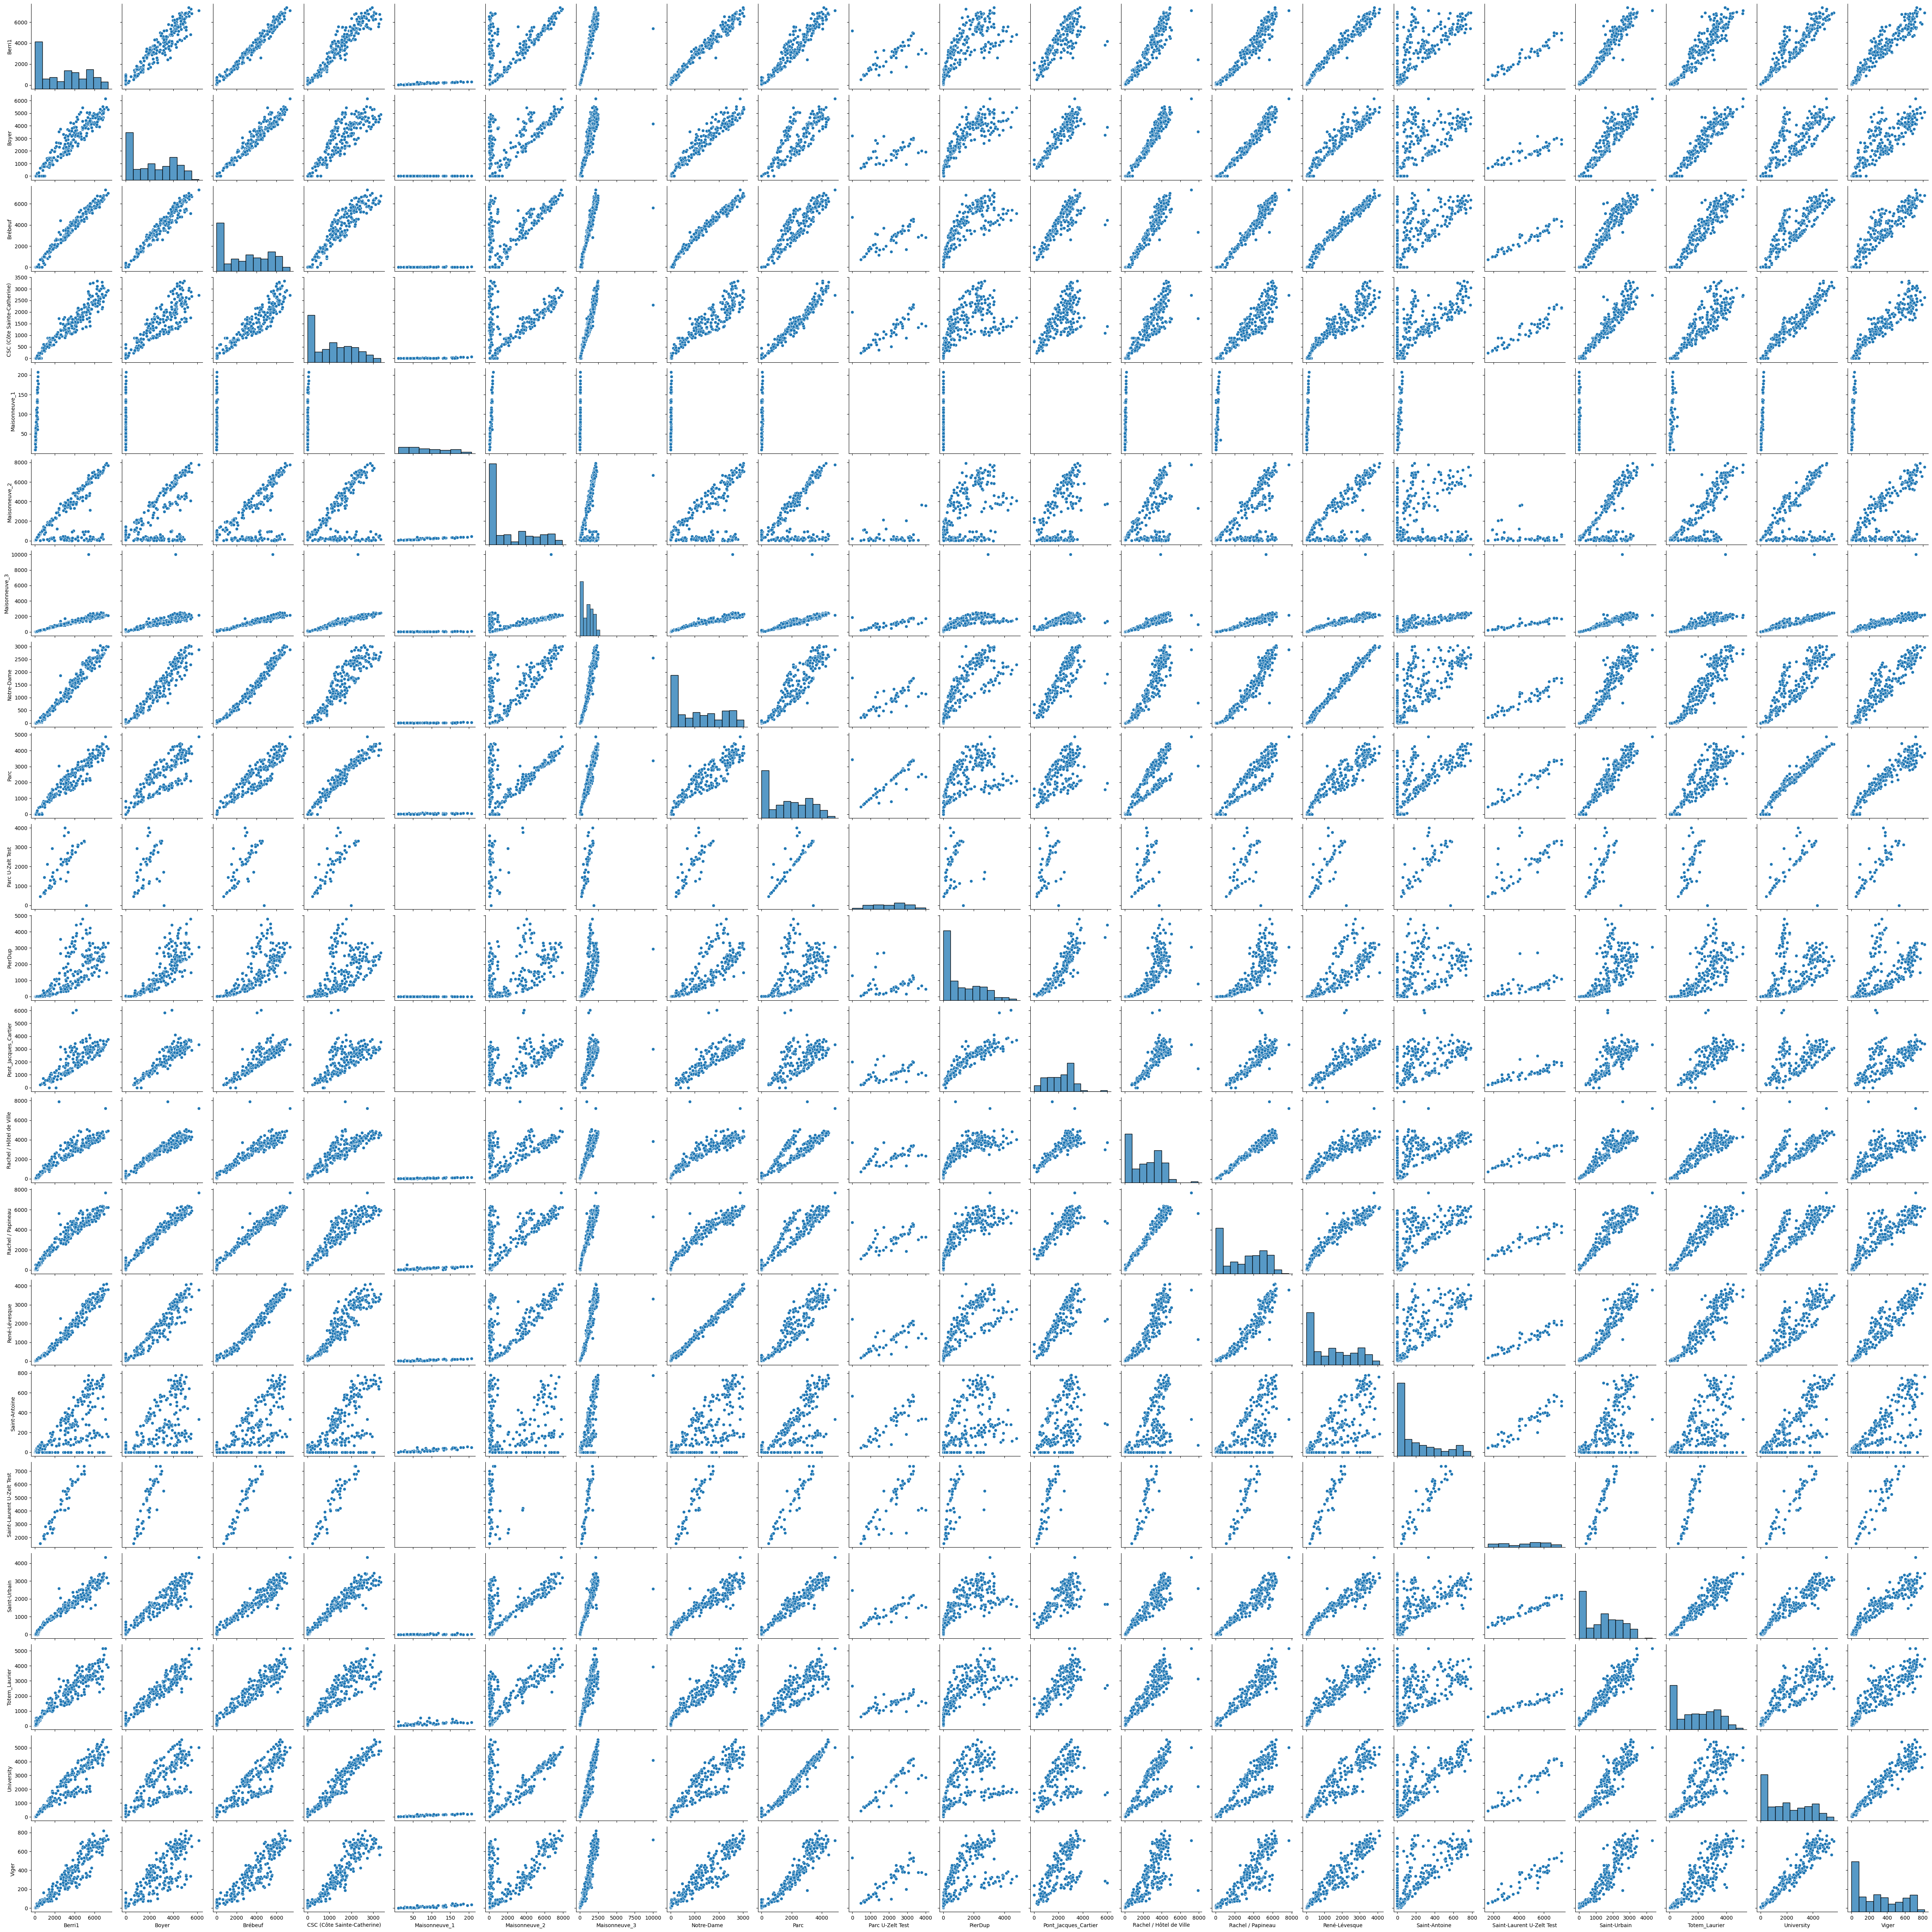

In [127]:
#Para realizar identificar las posibles regresiones que se pueden realizar,
#utilizamos seaborn para ver sus gráficas.
sns.pairplot(dataset)


## Aplicar regresión lineal múltiple sobre la variable objetivo y mínimo 3 variables independientes.

YM_DATA: Variable dependiente: `CSC (CÃ´te Sainte-Catherine)`

XM_DATA: Variables independientes:

- `Berril1`
- `Boyer`
- `Brébeuf`

In [112]:
#Definimos las varibales data x y.
XM_DATA = dataset[['Berri1', 'Boyer', 'Brébeuf']].values
YM_DATA = dataset[['CSC (Côte Sainte-Catherine)']].values

In [113]:
print(YM_DATA)

[[  17]
 [  15]
 [   7]
 [   0]
 [   0]
 [   1]
 [   3]
 [   0]
 [   0]
 [   0]
 [   4]
 [  16]
 [  17]
 [  33]
 [  32]
 [   7]
 [   0]
 [   2]
 [  14]
 [  20]
 [  36]
 [  52]
 [  45]
 [  14]
 [   6]
 [  36]
 [  51]
 [  51]
 [  65]
 [   9]
 [   2]
 [   6]
 [  10]
 [  26]
 [  12]
 [   4]
 [   8]
 [   1]
 [   0]
 [   0]
 [   0]
 [   0]
 [   1]
 [   3]
 [   1]
 [   0]
 [  11]
 [  29]
 [  30]
 [   8]
 [   0]
 [   0]
 [   0]
 [   0]
 [   0]
 [   1]
 [  12]
 [   1]
 [   0]
 [   1]
 [  16]
 [  29]
 [   0]
 [   0]
 [   2]
 [   7]
 [   3]
 [   6]
 [  61]
 [ 214]
 [ 219]
 [ 199]
 [  56]
 [   0]
 [   1]
 [  79]
 [ 103]
 [   0]
 [   0]
 [   0]
 [   0]
 [   0]
 [   0]
 [   0]
 [   0]
 [   0]
 [  54]
 [   0]
 [ 156]
 [ 449]
 [ 594]
 [ 601]
 [ 520]
 [  55]
 [ 114]
 [ 235]
 [ 873]
 [ 883]
 [ 882]
 [ 382]
 [ 467]
 [ 853]
 [1768]
 [1694]
 [1720]
 [1798]
 [1580]
 [ 628]
 [1019]
 [ 711]
 [ 754]
 [ 713]
 [ 555]
 [ 794]
 [ 625]
 [ 821]
 [1125]
 [2074]
 [1978]
 [2095]
 [1947]
 [1682]
 [1741]
 [2558]
 [2954]


In [114]:
print(XM_DATA)

[[  58   12    4]
 [  75    7    5]
 [  79    7    3]
 [  10    1   21]
 [  42    0    2]
 [ 101    0    1]
 [ 121   15    5]
 [  70    0   36]
 [  88    3    5]
 [  29    7    6]
 [  66    4    2]
 [ 183    4    4]
 [ 183    2    9]
 [ 183    2    6]
 [ 183    1    7]
 [ 177    5    2]
 [  48    2    0]
 [  84    1    4]
 [ 256    1    1]
 [ 262    3    6]
 [ 242    2    4]
 [ 278   17    5]
 [ 307    8    7]
 [ 163    1    5]
 [  81    0    1]
 [ 234    3    6]
 [ 276    1    2]
 [ 335    0   12]
 [ 327   10   38]
 [ 181    1    3]
 [  65    3    0]
 [  54    2    2]
 [ 127    0   53]
 [ 203    0   45]
 [ 263    1   18]
 [ 236    0   85]
 [ 193    1   36]
 [  79    3    1]
 [  36    3    0]
 [ 120    3   13]
 [ 260    2    8]
 [ 300    0    7]
 [ 226   15   16]
 [ 163    3   37]
 [  53    0   13]
 [  68    0    5]
 [ 193    0   11]
 [ 250    0   43]
 [ 261    0   19]
 [ 224    0   12]
 [ 137    0   10]
 [  59    0   10]
 [  94    0    0]
 [ 170    0    0]
 [ 241    0    7]
 [ 252    

In [115]:
# Escalado que evita problemas con diferentes escalas que pueden afectar el rendimiento del modelo.
scaler = StandardScaler()
scaler.fit(XM_DATA)
scaled_X = scaler.transform(XM_DATA)

In [116]:
# Dividir el conjunto de datos en conjunto de entrenamiento y conjunto de prueba
X_train, X_test, y_train, y_test = train_test_split(scaled_X, YM_DATA, test_size = 0.3, random_state = 0)

In [117]:
# Entrenamiento del modelo de Regresión Lineal Múltiple en el conjunto de Entrenamiento
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression()

In [122]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[1302.55 1393.  ]
 [2217.04 1990.  ]
 [  46.4     7.  ]
 [  32.56    7.  ]
 [1670.4  1544.  ]
 [ 104.25    0.  ]
 [2181.33 2371.  ]
 [2435.74 2261.  ]
 [1265.99 1179.  ]
 [2782.53 2452.  ]
 [  54.18    2.  ]
 [1166.18 1694.  ]
 [2473.66 2954.  ]
 [1257.75  998.  ]
 [1086.37 1185.  ]
 [  60.05   16.  ]
 [1529.   1741.  ]
 [1861.03 2154.  ]
 [  26.51    3.  ]
 [  70.98   51.  ]
 [2013.35 1402.  ]
 [1119.82 1542.  ]
 [1573.63 1594.  ]
 [2726.66 2140.  ]
 [2952.15 3122.  ]
 [1069.54  901.  ]
 [1152.15 1025.  ]
 [  41.69    0.  ]
 [  30.55    3.  ]
 [1166.5   955.  ]
 [2783.78 3049.  ]
 [  77.54   45.  ]
 [2143.33 2314.  ]
 [  65.76   52.  ]
 [  75.26    1.  ]
 [1428.5  1561.  ]
 [  52.77   17.  ]
 [ 693.1  1019.  ]
 [ 133.39   61.  ]
 [1218.1  1214.  ]
 [2498.94 2523.  ]
 [ 622.84  609.  ]
 [  28.98    1.  ]
 [2135.3  2127.  ]
 [2392.48 2036.  ]
 [ 306.48  520.  ]
 [2219.47 2002.  ]
 [2688.56 2912.  ]
 [  96.14    1.  ]
 [  85.58    0.  ]
 [1605.68 1484.  ]
 [ 208.69  227.  ]
 [2381.25 28

Este output nos permite evaluar cuán cercanas están las predicciones de tu modelo a los valores reales. Se puede ver si las predicciones tienden a ser mayores o menores que los valores reales y cuánta diferencia existe en cada caso. En general predicciones están en general cercanas a los valores reales, pero existen algunas diferencias en cada ejemplo. Lo cual es normal e indica que el modelo de regresión linear multiple esta estimando los valores de la variable dependiente cercano a los valores reales.

In [119]:
r2_score(y_test, y_pred)

0.944210758310001

Este valor del coeficiente indica que aproximadamente el 94% de la variabilidad en la variable dependiente ('CSC (Côte Sainte-Catherine)') puede explicarse mediante las variables independientes incluidas en el modelo ('Berri1', 'Boyer', 'Brébeuf'). El modelo es capaz de explicar una gran parte de la variación en la variable de interés. Un R2 alto, como en este caso indica que las variables independientes utilizadas en el modelo tienen una fuerte capacidad predictiva con respecto a la variable dependiente.

In [123]:
coeficiente = regressor.coef_  # Coeficiente de las características
intercepcion = regressor.intercept_  # Intercepción del modelo
print(coeficiente)
print(intercepcion)

[[ 522.84 -827.29 1211.79]]
[1161.86]


Se presenta un incremento unitario con 'Berri1' está asociado con un aumento de alrededor de 522.839 en el valor predicho, lo cual indica una influencia negativa sobre la variable independiente.

Caso contrario con 'Boyer' ya que está asociado con una disminución de alrededor de -827.285 en el valor predicho, lo cual indica una influencia negativa sobre la variable independiente.

Para la variable 'Brébeuf', el coeficiente es aproximadamente 1211.787. lo cual indica una influencia positiva sobre la variable independiente como tambien lo hace la variable dependiente 'Berri1'.

La intercepción del modelo es de aproximadamente 1161.86, lo que representa el valor predicho de 'CSC (Côte Sainte-Catherine)' cuando todas las variables independientes son iguales a cero.

## Aplicar regresión polinómica sobre la variable objetivo y mínimo 3 variables independientes.

---

Decidimos realizar el análisis con los siguientes:

Y_DATA: Variable dependiente - *PierDup*

X_DATA: Variables dependientes - *Boyer, Pont_Jacques_Cartier, Rachel / Hôtel de Ville, Rachel / Papineau*

---

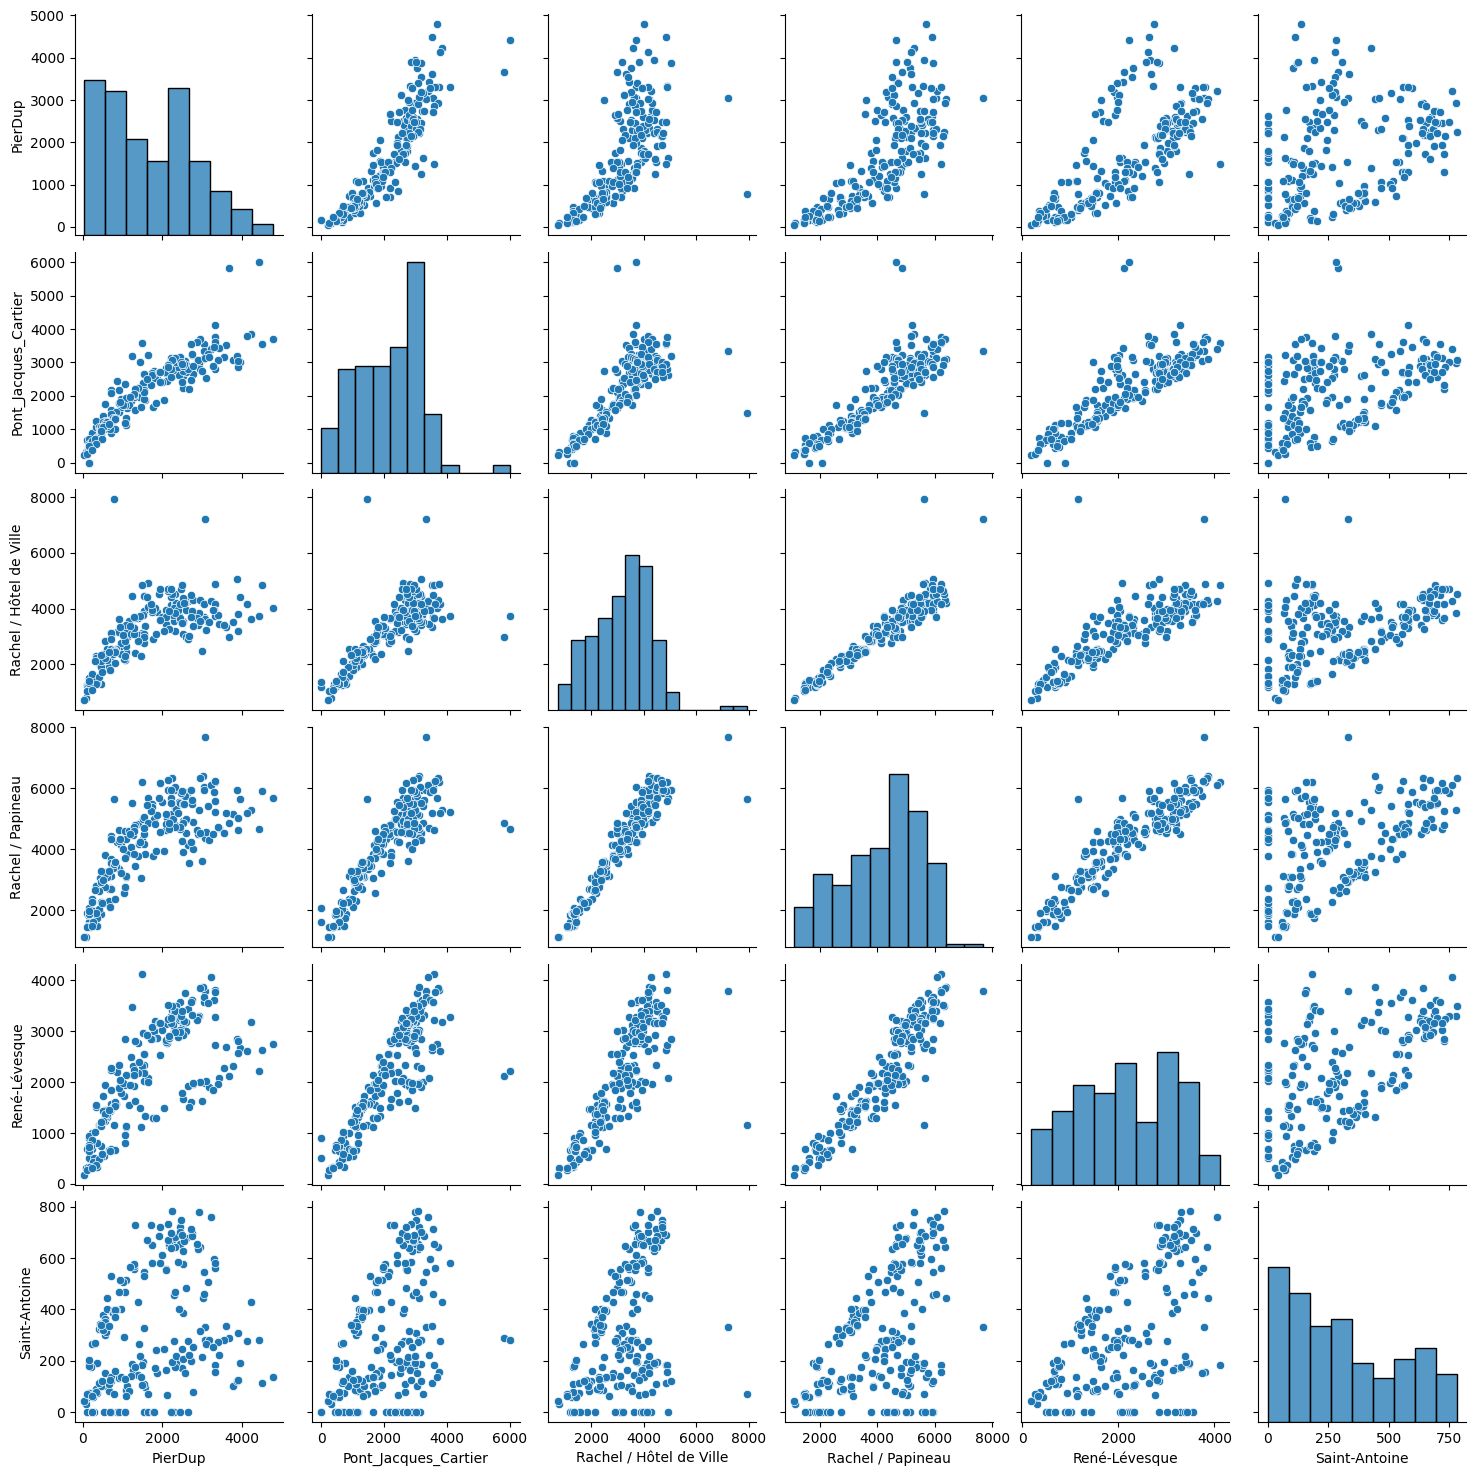

In [128]:
#Definimos las varibales data x y.
df_12_16 = dataset.iloc[:, 12:18]
df_sin_nan = df_12_16.dropna()
X_DATA = df_sin_nan.iloc[:, 1:].values
Y_DATA = df_sin_nan.iloc[:, 0].values

sns.pairplot(df_sin_nan)

In [ ]:
#Imputa los valores faltantes (NaN) en X_SCALED con la media
imputer = SimpleImputer(strategy = 'mean')
X_SCALED_IMPUTED = imputer.fit_transform(X_DATA)

In [ ]:
#Reallizamos la regresión lineal polinómica
deg_of_poly = 2
poly = PolynomialFeatures(degree = deg_of_poly)
X_POLY = poly.fit_transform(X_SCALED_IMPUTED)

In [ ]:
#Se decidió realizar la separación de datos con un 40% de datos para prueba,
#Debido a que reduce el error de R^2.
X_TRAIN, X_TEST, Y_TRAIN, Y_TEST = train_test_split(
                                    X_POLY, Y_DATA, test_size = 0.4)

In [ ]:
regressor = LinearRegression()
regressor.fit(X_TRAIN, Y_TRAIN)

In [ ]:
Y_PRED = regressor.predict(X_TEST)
r2_score(Y_TEST, Y_PRED)